# Getting reach average shear stresses 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# import topography data
P2_topo = pd.read_csv('XS_topo/P2_topo.csv')
P3_topo = pd.read_csv('XS_topo/P3_topo.csv')
P4_topo = pd.read_csv('XS_topo/P4_topo.csv')
P6_topo = pd.read_csv('XS_topo/P6_topo.csv')

# import depth data and make date the index
depth_2021 = pd.read_csv('water_depth/2021_depths.csv', index_col='Date_Time', parse_dates=True)
depth_2022 = pd.read_csv('water_depth/2022_depths.csv', index_col='Date_Time', parse_dates=True)
depth_2023 = pd.read_csv('water_depth/2023_depths.csv', index_col='Date_Time', parse_dates=True)

Function Definition

In [2]:
def get_water_depth(x_coordinate, z_coordinate, wse):
    tempCalc1 = wse - z_coordinate
    if tempCalc1.size == 0:
        return np.nan, tempCalc1  # return nan if tempCalc1 is empty
    
    water_depth = tempCalc1[tempCalc1 > 0]
    if water_depth.size == 0:
        return np.nan, tempCalc1  # return nan if no positive water depths are found
    
    water_depth_avg = np.nanmedian(water_depth)
    
    return water_depth_avg, tempCalc1

def calculate_average_depth(topography_df, depth_timeseries, depth_location):
    """
    Calculate the cross-sectional average depth across a river at each time step in the time series.

    Parameters:
    topography_df (pd.DataFrame): distance' and 'elevation' columns representing the cross-sectional topography.
    depth_timeseries (pd.DataFrame): 'depth' column representing the water depths (time series) at the specified location.
    depth_location (float): X-coordinate where the depth measurements are taken (in meters).

    Returns:
    avg_depth_timeseries (pd.DataFrame): DataFrame with time and cross-sectional average depths for each time step.
    """

    X = topography_df['distance'].values
    Z = topography_df['elevation'].values
    depth = depth_timeseries['depth'].values
    times = depth_timeseries.index 

    #find the riverbed elevation at the depth measurement location
    riverbed_elevation_at_depth_location = np.interp(depth_location, X, Z)

    avg_depths = [] 

    # loop over each time step and calculate average depth
    for d in depth:
        wse = riverbed_elevation_at_depth_location + d  # wse at this time step
        water_depth_avg, _ = get_water_depth(X, Z, wse)  # calculate average depth
        avg_depths.append(water_depth_avg)

    # create a DataFrame with time and average depth for each time step
    average_depth_timeseries = pd.DataFrame({
        'time': times,
        'average_depth': avg_depths
    }).set_index('time')

    return average_depth_timeseries

Prepping data to process through functions

In [3]:
# 2021 piezometers
P2_2021_depth = pd.DataFrame(depth_2021['P2']) 
P2_2021_depth.columns = ['depth'] # change the column name to 'depth'
P3_2021_depth = pd.DataFrame(depth_2021['P3'])
P3_2021_depth.columns = ['depth']
P4_2021_depth = pd.DataFrame(depth_2021['P4'])
P4_2021_depth.columns = ['depth']
P6_2021_depth = pd.DataFrame(depth_2021['P6'])
P6_2021_depth.columns = ['depth']

# 2022 piezometers
P2_2022_depth = pd.DataFrame(depth_2022['P2'])
P2_2022_depth.columns = ['depth']
P3_2022_depth = pd.DataFrame(depth_2022['P3'])
P3_2022_depth.columns = ['depth']
P4_2022_depth = pd.DataFrame(depth_2022['P4'])
P4_2022_depth.columns = ['depth']
P6_2022_depth = pd.DataFrame(depth_2022['P6'])
P6_2022_depth.columns = ['depth']

# 2023 piezometers
P2_2023_depth = pd.DataFrame(depth_2023['P2'])
P2_2023_depth.columns = ['depth']
P3_2023_depth = pd.DataFrame(depth_2023['P3'])
P3_2023_depth.columns = ['depth']
P4_2023_depth = pd.DataFrame(depth_2023['P4'])
P4_2023_depth.columns = ['depth']
P6_2023_depth = pd.DataFrame(depth_2023['P6'])
P6_2023_depth.columns = ['depth']

P2_2022_depth

,depth
Date_Time,
2022-03-01 00:00:00,0.120852
2022-03-01 00:15:00,0.119627
2022-03-01 00:30:00,0.118516
2022-03-01 00:45:00,0.117518
2022-03-01 01:00:00,0.116634
...,...
2022-09-16 23:00:00,0.116895
2022-09-16 23:15:00,0.118644
2022-09-16 23:30:00,0.115145


Obtaining average depths by cross section

In [31]:
# 2021 average depth
P2_2021_avg_depth = calculate_average_depth(P2_topo, P2_2021_depth, 0.7)
P3_2021_avg_depth = calculate_average_depth(P3_topo, P3_2021_depth, 0.6)
P4_2021_avg_depth = calculate_average_depth(P4_topo, P4_2021_depth, 2.5)
P6_2021_avg_depth = calculate_average_depth(P6_topo, P6_2021_depth, 1.7)
# put all in one dataframe
avg_depth_2021 = pd.concat([P2_2021_avg_depth, P3_2021_avg_depth, P4_2021_avg_depth, P6_2021_avg_depth], axis=1)
avg_depth_2021.columns = ['P2', 'P3', 'P4', 'P6']

# 2022 average depth
P2_2022_avg_depth = calculate_average_depth(P2_topo, P2_2022_depth, 0.7)
P3_2022_avg_depth = calculate_average_depth(P3_topo, P3_2022_depth, 0.6)
P4_2022_avg_depth = calculate_average_depth(P4_topo, P4_2022_depth, 2.5)
P6_2022_avg_depth = calculate_average_depth(P6_topo, P6_2022_depth, 1.7)
# put all in one dataframe
avg_depth_2022 = pd.concat([P2_2022_avg_depth, P3_2022_avg_depth, P4_2022_avg_depth, P6_2022_avg_depth], axis=1)
avg_depth_2022.columns = ['P2', 'P3', 'P4', 'P6']

# 2023 average depth
P2_2023_avg_depth = calculate_average_depth(P2_topo, P2_2023_depth, 0.7)
P3_2023_avg_depth = calculate_average_depth(P3_topo, P3_2023_depth, 0.6)
P4_2023_avg_depth = calculate_average_depth(P4_topo, P4_2023_depth, 2.5)
P6_2023_avg_depth = calculate_average_depth(P6_topo, P6_2023_depth, 1.7)
# put all in one dataframe
avg_depth_2023 = pd.concat([P2_2023_avg_depth, P3_2023_avg_depth, P4_2023_avg_depth, P6_2023_avg_depth], axis=1)
avg_depth_2023.columns = ['P2', 'P3', 'P4', 'P6']

Testing manually

2723.120793689


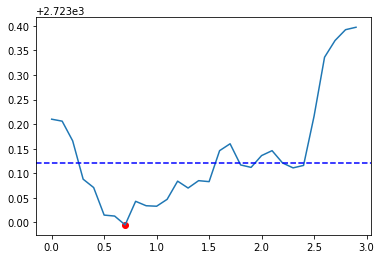

In [53]:
X = P2_topo['distance']
Z = P2_topo['elevation']
depth = depth_2021['P2']
depth_location = 0.7
# riverbed elevation at the depth measurement location
riverbed_elevation_at_depth_location = np.interp(depth_location, X, Z)
wse = riverbed_elevation_at_depth_location + depth
# testing the first time step
wse = wse.iloc[0]
print(wse)
# plot the cross section
plt.plot(X, Z)
plt.scatter(depth_location, np.interp(depth_location, X, Z), color='red')
# plot the water surface elevation
plt.axhline(y=wse, color='blue', linestyle='--')
plt.show()

In [54]:
water_depth_avg, tempCalc1 = get_water_depth(X, Z, wse)
water_depth_avg

0.05508780664708598

In [55]:
water_depth = wse - Z
water_depth = water_depth[water_depth > 0]
print(water_depth)
water_depth_avg = np.mean(water_depth)
water_depth_avg

3     0.032794
4     0.049794
5     0.105794
6     0.107794
7     0.125794
8     0.077794
9     0.086794
10    0.087794
11    0.073794
12    0.036794
13    0.050794
14    0.035794
15    0.037794
18    0.003794
19    0.008794
23    0.009794
24    0.004794
Name: elevation, dtype: float64


0.05508780664708598

example with high water level

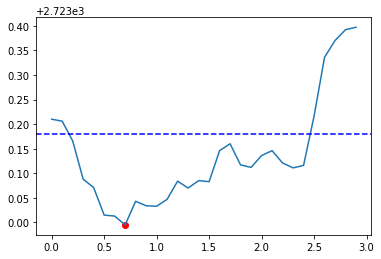

In [56]:
wse = 2723.18
# plot the cross section
plt.plot(X, Z)
plt.scatter(depth_location, np.interp(depth_location, X, Z), color='red')
# plot the water surface elevation
plt.axhline(y=wse, color='blue', linestyle='--')
plt.show()

In [49]:
water_depth_avg, tempCalc1 = get_water_depth(X, Z, wse)
water_depth_avg

0.09339130434763439

In [50]:
water_depth = wse - Z
water_depth = water_depth[water_depth > 0]
print(water_depth)
water_depth_avg = np.mean(water_depth)
water_depth_avg

2     0.014
3     0.092
4     0.109
5     0.165
6     0.167
7     0.185
8     0.137
9     0.146
10    0.147
11    0.133
12    0.096
13    0.110
14    0.095
15    0.097
16    0.034
17    0.020
18    0.063
19    0.068
20    0.044
21    0.034
22    0.059
23    0.069
24    0.064
Name: elevation, dtype: float64


0.09339130434763439